In [3]:
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import geopandas as gpd

import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

import platform
if platform.system() =='Linux': path='/home/clc/Desktop/AGF350_data/Data/'
elif platform.system() =='Windows': path='../Data/'

cmap = plt.get_cmap('terrain')
terrain_truncated = truncate_colormap(cmap, 0.1, .9)

## Checking AROME DEM

In [4]:
AROME_DEM = xr.open_dataset(path+'ModelOutput/AromeArctic//AA_static_fields_2p5km.nc', decode_coords='all')
AROME_DEM['surface_geopotential'] = AROME_DEM['surface_geopotential']/9.81
AROME_DEM

<xarray.Dataset>
Dimensions:               (x: 739, y: 949)
Coordinates:
  * x                     (x) float32 2.786e+05 2.811e+05 ... 2.124e+06
  * y                     (y) float32 -8.98e+05 -8.955e+05 ... 1.472e+06
    longitude             (y, x) float64 ...
    latitude              (y, x) float64 ...
    projection_lambert    int32 ...
    time                  datetime64[ns] ...
    height0               float32 ...
Data variables:
    surface_geopotential  (y, x) float32 0.1074 -0.3513 0.2603 ... 26.87 12.21
    land_area_fraction    (y, x) float32 ...
Attributes: (12/31)
    Conventions:                     CF-1.6, ACDD
    institution:                     Norwegian Meteorological Institute, MET ...
    institution_short_name:          NO/MET
    creator_url:                     met.no
    source:                          AROME-Arctic 2.5km
    title:                           AROME_Arctic 2.5km
    ...                              ...
    last_metadata_update:            20220603T0406Z
    date_metadata_modified:          20220603T0406Z
    date_metadata_modified_type:     20220603T0406Z
    date_created:                    20220603T0406Z
    collections:                     ADC, METNCS
    DODS_EXTRA.Unlimited_Dimension:  time

/tmp/ipykernel_160097/1171916012.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm=ax.pcolormesh(AROME_DEM.longitude, AROME_DEM.latitude, AROME_DEM.surface_geopotential, vmax=1000, cmap=terrain_truncated)


Elevation of cell containing the airport: 62.314323
Elevation of cell containing Layla: 232.95651


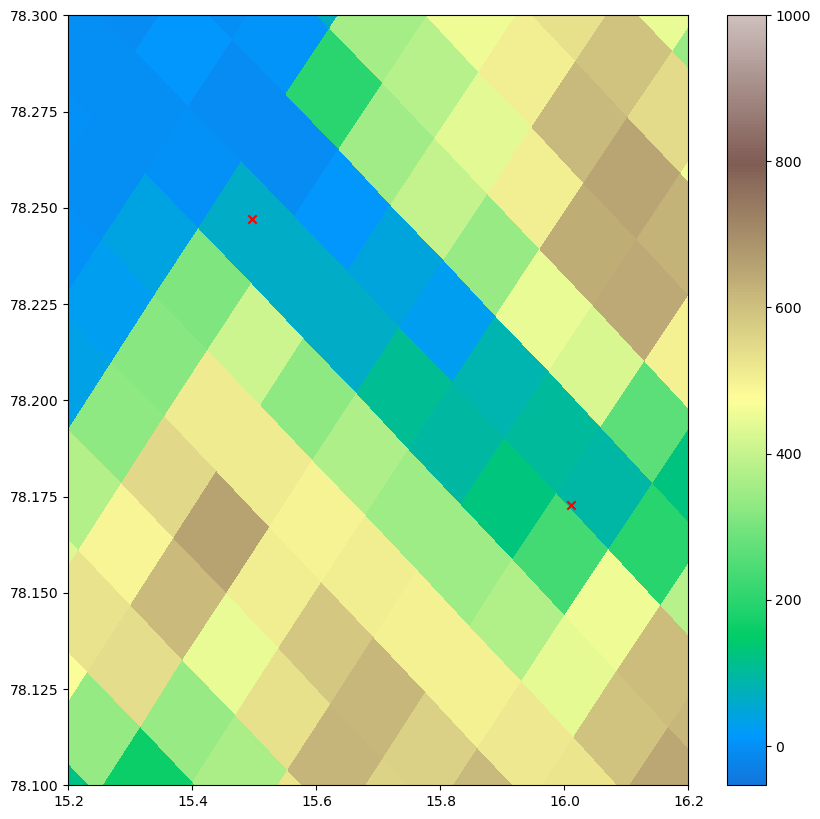

In [5]:


fig,ax = plt.subplots(figsize=(10,10))
pcm=ax.pcolormesh(AROME_DEM.longitude, AROME_DEM.latitude, AROME_DEM.surface_geopotential, vmax=1000, cmap=terrain_truncated)
fig.colorbar(pcm)
ax.set_xlim(15.2, 16.2)
ax.set_ylim(78.1, 78.3)

#ax.set_xlim(15.1, 16.2)
#ax.set_ylim(78.1, 78.3)

lat_airport, lon_airport = 78.2469799204509, 15.496321976349787
lat_layla, lon_layla = 78.172686, 16.010102
ax.scatter(lon_airport, lat_airport, marker='x', c='r')
ax.scatter(lon_layla, lat_layla, marker='x', c='r')

index_airport = np.unravel_index(np.argmin(np.sqrt(  (AROME_DEM.latitude.data-lat_airport)**2 
                                                   + (AROME_DEM.longitude.data-lon_airport)**2)), 
                                 AROME_DEM.latitude.data.shape)

index_layla = np.unravel_index(np.argmin(np.sqrt(  (AROME_DEM.latitude.data-lat_layla)**2 
                                                   + (AROME_DEM.longitude.data-lon_layla)**2)), 
                                 AROME_DEM.latitude.data.shape)
print('Elevation of cell containing the airport:', AROME_DEM.surface_geopotential.data[index_airport])
print('Elevation of cell containing Layla:', AROME_DEM.surface_geopotential.data[index_layla])


In [ ]:
ds = xr.open_dataset(load_path()+'ModelOutput/AromeArctic/AA_static_fields_2p5km.nc', decode_coords='all')#.rio.reproject('EPSG:4326')

D = ((ds.latitude.data-78.172686)**2 + (ds.longitude.data-16.010102)**2)**.5

argmin = np.unravel_index(np.argmin(D), D.shape)
print(argmin)
print(ds.surface_geopotential.data[argmin]/9.81)